In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import shapely.geometry
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import os

current_palette = sns.color_palette()
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())

sns.set(rc={'figure.figsize':(10,4)}, font_scale=1.0, style='whitegrid', font='CMU Sans Serif')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

def save_fig(ax, folder, suffix, format="pdf"):
    fig = ax.get_figure()
    fig.tight_layout()

    fig.savefig(folder + suffix + "." + format)
    fig.clear()

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
locations = pd.read_csv("locations.csv")

In [33]:
RUN = 6
RESULTS_DIR = os.path.join(".", "results", f"results-test-{RUN}")

In [34]:
files = os.listdir(os.path.join(".", RESULTS_DIR))

df_experiment = pd.DataFrame()
df_complete = pd.DataFrame()

for f in files:
    client = int(f[len("cesink"):-len(".ext4-results.csv")])

    df_run = pd.read_csv(os.path.join(".", RESULTS_DIR, f))
    # df_client.dropna(inplace=True)
    # df_run = df_client[["sensor_id", "service_id", "packet_n", "packet_len","send_time1", "recv_time1", "send_time2", "recv_time2"]].copy()

    # df_run["client"] = client

    # convert to milliseconds
    df_run["send_time1"] = df_run["send_time1"] / 1e6
    df_run["send_time2"] = df_run["send_time2"] / 1e6
    df_run["recv_time1"] = df_run["recv_time1"] / 1e6
    df_run["recv_time2"] = df_run["recv_time2"] / 1e6


    df_run["send_latency1"] = df_run["recv_time1"] - df_run["send_time1"]
    df_run["send_latency2"] = df_run["recv_time2"] - df_run["send_time2"]
    df_run["processing_latency"] = df_run["send_time2"] - df_run["recv_time1"]
    df_run["total_latency"] = df_run["recv_time2"] - df_run["send_time1"]

    df_run["latency"] = df_run["recv_time2"] - df_run["send_time1"]

    # print(locations.loc[locations["id"] == client, "lat"].values[0])

    df_complete.append(df_run)

    df_experiment = df_experiment.append(pd.DataFrame({
        "client": client,
        "lat": locations.loc[locations["id"] == client, "lat"].values[0],
        "lng": locations.loc[locations["id"] == client, "lng"].values[0],
        "mean_send_latency1": df_run["send_latency1"].mean(),
        "mean_send_latency2": df_run["send_latency2"].mean(),
        "mean_processing_latency": df_run["processing_latency"].mean(),
        "mean_total_latency": df_run["total_latency"].mean(),
        "median_send_latency1": df_run["send_latency1"].median(),
        "median_send_latency2": df_run["send_latency2"].median(),
        "median_processing_latency": df_run["processing_latency"].median(),
        "median_total_latency": df_run["total_latency"].median(),
        "max_send_latency1": df_run["send_latency1"].max(),
        "max_send_latency2": df_run["send_latency2"].max(),
        "max_processing_latency": df_run["processing_latency"].max(),
        "max_total_latency": df_run["total_latency"].max(),
        "99th_send_latency1": df_run["send_latency1"].quantile(0.99),
        "99th_send_latency2": df_run["send_latency2"].quantile(0.99),
        "99th_processing_latency": df_run["processing_latency"].quantile(0.99),
        "99th_total_latency": df_run["total_latency"].quantile(0.99),
        "95th_send_latency1": df_run["send_latency1"].quantile(0.95),
        "95th_send_latency2": df_run["send_latency2"].quantile(0.95),
        "95th_processing_latency": df_run["processing_latency"].quantile(0.95),
        "95th_total_latency": df_run["total_latency"].quantile(0.95),
    }, index=[0]))

df_experiment

,client,lat,lng,mean_send_latency1,mean_send_latency2,mean_processing_latency,mean_total_latency,median_send_latency1,median_send_latency2,median_processing_latency,...,max_processing_latency,max_total_latency,99th_send_latency1,99th_send_latency2,99th_processing_latency,99th_total_latency,95th_send_latency1,95th_send_latency2,95th_processing_latency,95th_total_latency
0,14,49.66600,-169.8760,5.984397,56.281544,8.285543,70.551484,5.400024,54.052490,2.092896,...,73.514160,143.206299,20.968274,78.823735,46.884800,104.811726,8.487805,71.374048,31.453113,91.101758
0,1,46.90400,-124.1050,5.984371,68.342662,7.076952,81.403985,5.400024,84.995483,0.826660,...,71.903809,162.119141,20.968274,87.389414,45.552866,136.172295,8.487805,87.110840,30.189612,121.256726
0,111,30.44820,164.2739,5.984333,51.645265,18.455816,76.085414,5.400024,55.660278,12.897583,...,123.893799,189.453613,20.968274,86.026873,57.513923,133.005107,8.487805,82.017834,42.073596,117.929944
0,97,49.46000,-149.4083,5.984333,32.541858,16.975967,55.502158,5.400024,26.323975,11.333252,...,112.530518,180.370605,20.968274,69.651370,55.856265,96.288152,8.487805,69.509521,40.533398,87.529578
0,71,14.51320,-145.9467,5.984358,34.259563,14.225959,54.469880,5.400269,20.869263,8.415649,...,93.627197,179.192627,20.968274,86.008821,53.015469,104.890466,8.487805,84.426758,37.682202,99.661536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,146,-17.36510,-149.3651,5.984358,43.242041,22.165209,71.391608,5.400269,32.502930,16.799683,...,144.775391,218.236572,20.968274,87.934333,61.380510,116.576165,8.487805,87.803711,45.896826,110.593506
0,43,39.37000,-123.9120,5.984307,45.076079,11.290911,62.351298,5.400024,39.014648,5.292603,...,76.706543,155.791260,20.968274,79.805684,49.974753,98.425544,8.487805,78.519775,34.589954,91.195129
0,26,47.96700,-124.9500,5.984333,67.673733,9.520084,83.178150,5.400024,79.315186,3.391357,...,74.551514,164.794922,20.968274,88.451421,48.201436,135.936240,8.487805,87.087646,32.748938,122.209314
0,18,-9.90000,-105.2000,5.984358,43.313548,8.692249,57.990154,5.400269,32.555786,2.512573,...,73.852295,156.289062,20.968274,88.173828,47.327185,102.633823,8.487805,88.015625,31.858313,97.776611


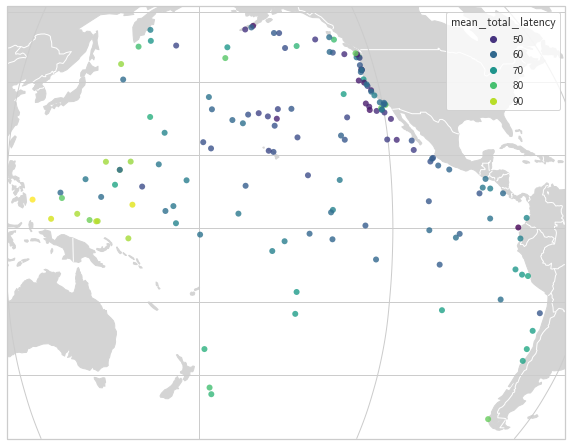

In [45]:
cmap = sns.color_palette("viridis", as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': cartopy.crs.Robinson(central_longitude=180)})

ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1, edgecolor=("#FFFFFF"))

ax.add_feature(cartopy.feature.LAND, facecolor=("#d4d4d4"))
ax.gridlines()

sns.scatterplot(ax=ax, data=df_experiment, x="lng", y="lat", transform=ccrs.PlateCarree(), palette=cmap, zorder=10, linewidth=0, alpha=0.8, hue="mean_total_latency")

plt.show()

In [36]:
test_df = pd.read_csv(os.path.join(RESULTS_DIR, "cesink0.ext4-results.csv"))

test_df["send_time1"] = test_df["send_time1"] / 1e6
test_df["send_time2"] = test_df["send_time2"] / 1e6
test_df["recv_time1"] = test_df["recv_time1"] / 1e6
test_df["recv_time2"] = test_df["recv_time2"] / 1e6

test_df["send_latency1"] = test_df["recv_time1"] - test_df["send_time1"]
test_df["send_latency2"] = test_df["recv_time2"] - test_df["send_time2"]
test_df["processing_latency"] = test_df["send_time2"] - test_df["recv_time1"]

<AxesSubplot:xlabel='send_time1', ylabel='processing_latency'>

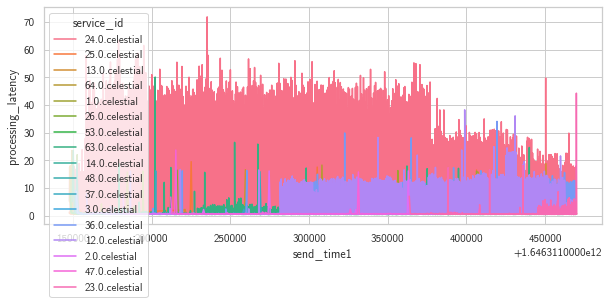

In [37]:
sns.lineplot(data=test_df, x="send_time1", y="processing_latency", hue="service_id")

In [38]:
test_df[test_df["processing_latency"] > 100000]

,sensor_id,service_id,packet_n,packet_len,send_time1,recv_time1,send_time2,recv_time2,send_latency1,send_latency2,processing_latency


In [39]:
# only 99% latency
test_df_filtered = test_df[test_df["processing_latency"] < test_df["processing_latency"].quantile(0.99)]
print(f"Removed {len(test_df) - len(test_df_filtered)} packets of {len(test_df)}")

Removed 250 packets of 25000


<AxesSubplot:xlabel='processing_latency', ylabel='Proportion'>

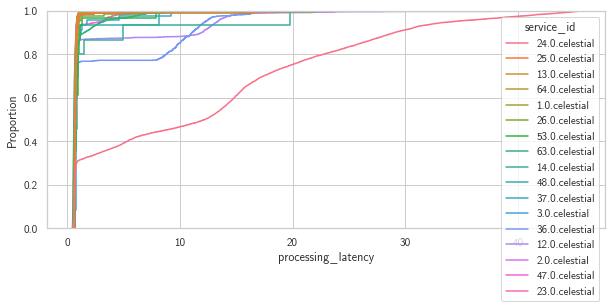

In [40]:
sns.ecdfplot(data=test_df_filtered, x="processing_latency", hue="service_id")

<AxesSubplot:xlabel='sensor_id', ylabel='count'>

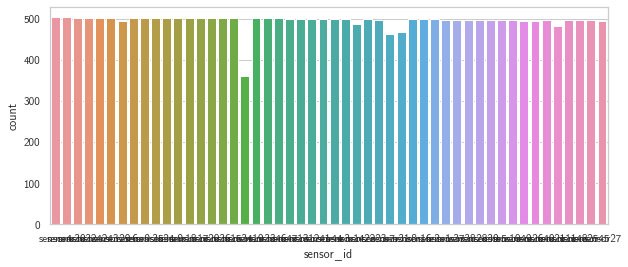

In [41]:
sns.countplot(data=test_df_filtered, x="sensor_id")

<AxesSubplot:xlabel='send_time1', ylabel='send_latency1'>

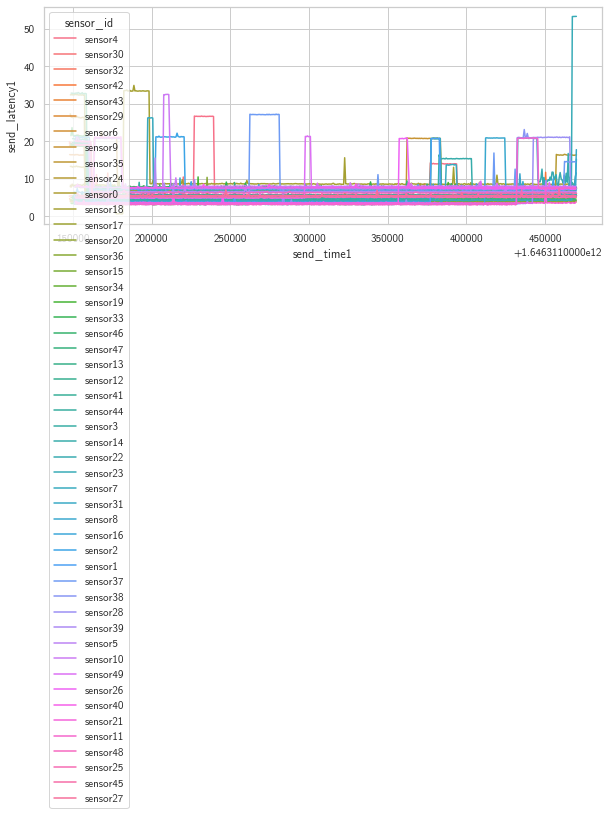

In [44]:
sns.lineplot(data=test_df, x="send_time1", y="send_latency1", hue="sensor_id")

<AxesSubplot:xlabel='send_time1', ylabel='send_latency2'>

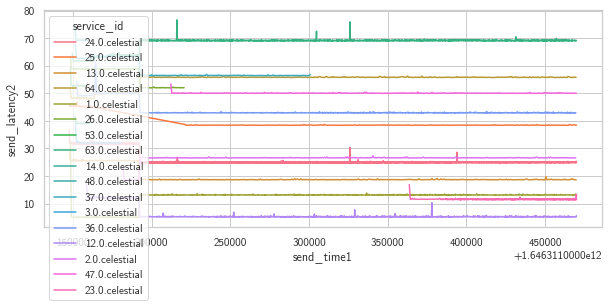

In [43]:
sns.lineplot(data=test_df, x="send_time1", y="send_latency2", hue="service_id")